In [1]:
from MyEDFImports import load_all_labels, load_all_data
from ssqueezepy import ssq_cwt, cwt
import numpy as np
import tensorflow as tf
import torch

2023-08-19 09:23:24.527219: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-19 09:23:25.079241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
torch.cuda.is_available()

True

In [3]:
data = load_all_data()

Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CN223100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CP229110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CX230050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/DG220020.edf...
EDF file detected
Setting chann

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:42: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LA216100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LM230010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/TK221110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:42: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


<RawEDF | CN223100.edf, 1 x 15611000 (31222.0 s), ~6 kB, data not loaded> with 1561 windows
<RawEDF | CP229110.edf, 1 x 20078000 (40156.0 s), ~6 kB, data not loaded> with 2007 windows
importing inverted file: CP229110.edf
/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CP229110.edf
<RawEDF | CX230050.edf, 1 x 17981000 (35962.0 s), ~6 kB, data not loaded> with 1798 windows
<RawEDF | DG220020.edf, 1 x 17756000 (35512.0 s), ~6 kB, data not loaded> with 1775 windows
<RawEDF | DO223050.edf, 1 x 18066500 (36133.0 s), ~6 kB, data not loaded> with 1806 windows
<RawEDF | LA216100.edf, 1 x 16333500 (32667.0 s), ~6 kB, data not loaded> with 1633 windows
<RawEDF | LM230010.edf, 1 x 17246500 (34493.0 s), ~6 kB, data not loaded> with 1724 windows
<RawEDF | TK221110.edf, 1 x 15991000 (31982.0 s), ~6 kB, data not loaded> with 1599 windows
<RawEDF | VC209100.edf, 1 x 18434500 (36869.0 s), ~6 kB, data not loaded> with 1843 windows
<RawEDF | VP214110.edf, 1 x 17252500 (34505.0 s)

In [4]:
data_short=data[:4000]

In [5]:
def calculate_dwf_squeezepy_minimal(signals, wavelet_name = 'morlet', scales = np.arange(1, 128,)):
    size = len(signals)
    output = np.ndarray(shape=(size,len(scales), len(scales)))
    for ind in range(size):
        if ind % 500 == 0:
            print(ind)
        signal = signals[ind]
        coef, freq, *_ = ssq_cwt(signal, wavelet_name, scales)
        coef_ = coef[:, :len(scales)]
        output[ind] = coef_
    return output

def calculate_dwf_squeezepy(signals, wavelet_name = 'morlet', scales = np.arange(1, 128,)):
    size = len(signals)
    output = np.ndarray(shape=(size,len(scales), len(scales)))
    for ind in range(size):
        if ind % 500 == 0:
            print(ind)
        signal = signals[ind]
        coef, freq = ssq_cwt(signal, wavelet_name, scales)
        coef_ = coef[:, :len(scales)]
        output[ind] = coef_
    return output


In [6]:
from ssqueezepy import Wavelet
wavelet = Wavelet()
wavelet.info()

GMW L1 wavelet
	gamma=3, beta=60
	Center frequency: 2.714000   [wc_ct, (cycles*radians)]
	Time resolution:  9.498688   [std_t, non-dimensional]
	Freq resolution:  0.052639   [std_w, non-dimensional]
	Heisenberg area:  0.500001214495


In [7]:
from ssqueezepy import process_scales
scales = np.arange(1,128, dtype=np.float32)
scales = process_scales(scales,32)

In [8]:
# swt_sq_short_4k = calculate_dwf_squeezepy_minimal(data_short, scales=scales)

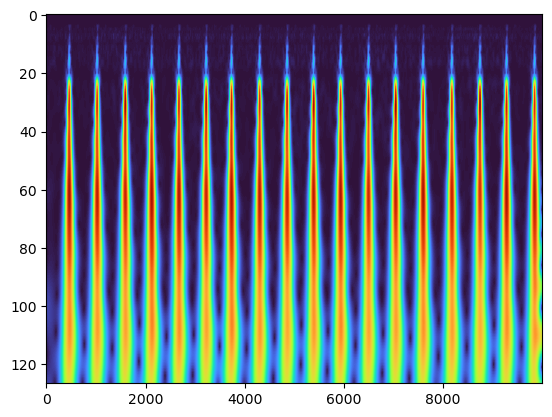

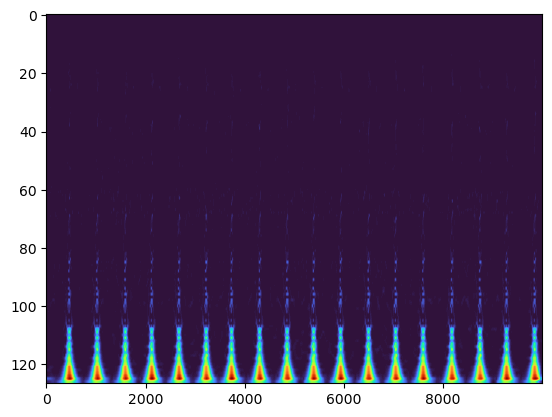

In [9]:
one_instance = data[4000]
cwt_1, wx, *_ = ssq_cwt(one_instance, scales=scales, wavelet='morlet')
import matplotlib.pyplot as plt
def viz(Tx, Wx):
    plt.imshow(np.abs(Wx), aspect='auto', cmap='turbo')
    plt.show()
    plt.imshow(np.abs(Tx), aspect='auto', cmap='turbo')
    plt.show()
#cwt, wx = cwt[:,:127], wx[:,:127]
viz(cwt_1, wx)

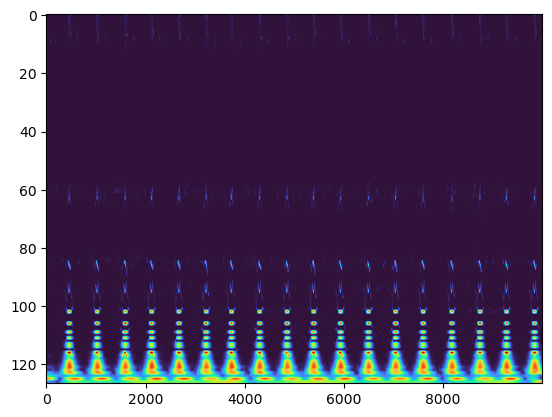

In [10]:
coefs = ssq_cwt(one_instance, scales=scales)[0]
plt.imshow(np.abs(coefs), aspect='auto', cmap='turbo')
plt.show()

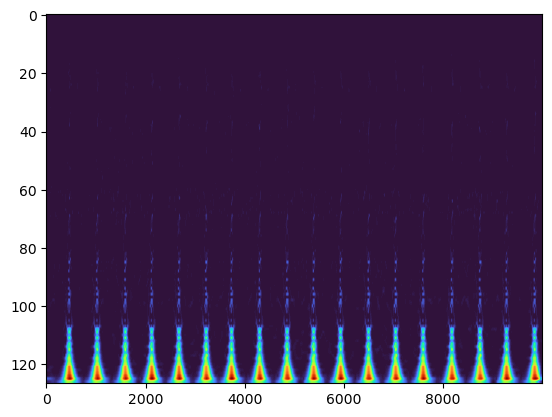

In [11]:
coefs = ssq_cwt(one_instance, scales=scales, wavelet='morlet')[0]
plt.imshow(np.abs(coefs), aspect='auto', cmap='turbo')
plt.show()

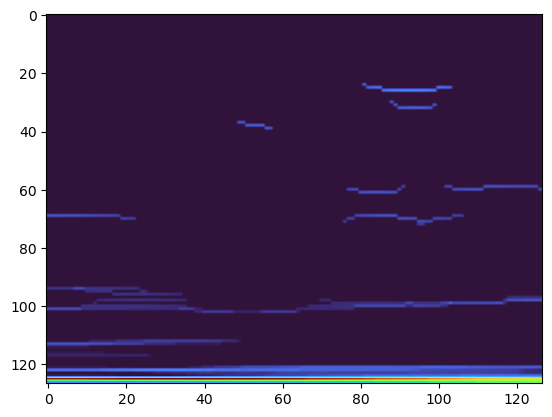

In [12]:
plt.imshow(np.abs(cwt_1[:, :127]), aspect='auto', cmap='turbo')
plt.show()

In [13]:
from ssqueezepy import cwt_fwd

ImportError: cannot import name 'cwt_fwd' from 'ssqueezepy' (/home/tadeusz/miniconda3/envs/tf/lib/python3.9/site-packages/ssqueezepy/__init__.py)

In [14]:
pywcwt_4000 = np.load('cwt_short_4000.npy')
first_one = pywcwt_4000[0]
plt.imshow(np.abs(first_one), aspect='auto', cmap='turbo')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'cwt_short_4000.npy'

In [15]:
10**1.2

15.848931924611133

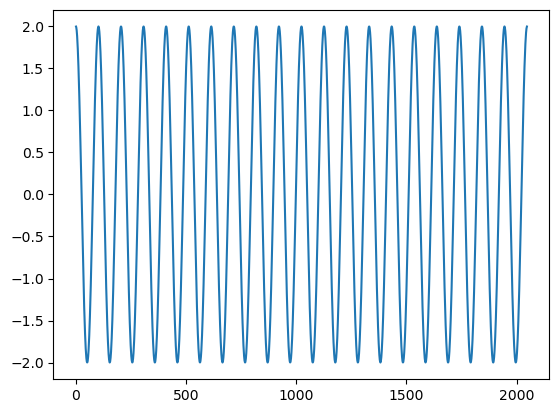

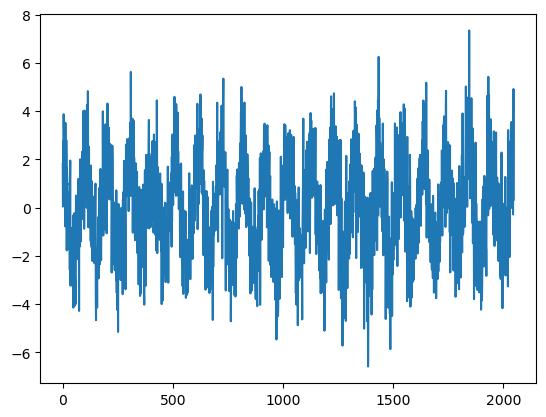

In [16]:
N = 2048
t = np.linspace(0, 10, N, endpoint=False)
xo = np.cos(2 * np.pi * 2 *t)
xo += xo[::-1]  # add self reflected
x = xo + np.sqrt(2) * np.random.randn(N)  # add noise

plt.plot(xo);
plt.show()
plt.plot(x);
plt.show()

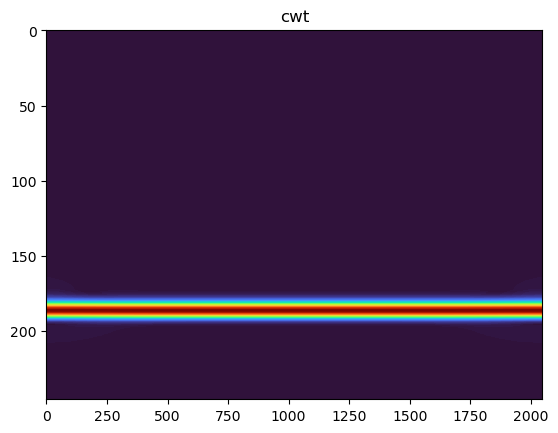

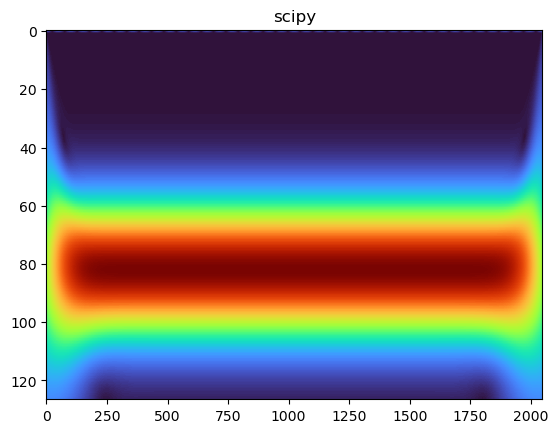

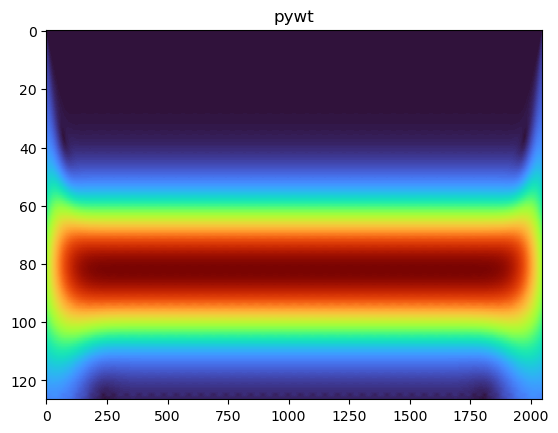

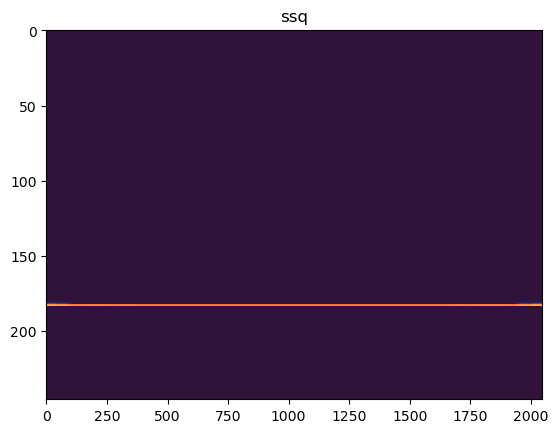

In [19]:
import pywt
import scipy.signal as sig

coefs_ssq = cwt(xo,  wavelet='morlet')[0]
plt.imshow(np.abs(coefs_ssq), aspect='auto', cmap='turbo')
plt.title('cwt')
plt.show()

coefs_ssq = sig.cwt(xo, sig.morlet2, np.arange(1,128))
plt.imshow(np.abs(coefs_ssq), aspect='auto', cmap='turbo')
plt.title('scipy')
plt.show()

coefs_pywt = pywt.cwt(xo, scales=scales, wavelet='cmor2-0.796')[0]
plt.imshow(np.abs(coefs_pywt), aspect='auto', cmap='turbo')
plt.title('pywt')
plt.show()

coefs_ssq = ssq_cwt(xo,  wavelet='morlet')[0]
plt.imshow(np.abs(coefs_ssq), aspect='auto', cmap='turbo')
plt.title('ssq')
plt.show()


In [ ]:
cwt_1

In [ ]:
cwt_1(xo, scales=scales, wavelet='morlet')

In [ ]:
import pywt
import scipy.signal as sig

coefs_ssq = cwt_1(xo, wavelet='morlet')[0]
plt.imshow(np.abs(coefs_ssq), aspect='auto', cmap='turbo')
plt.title('cwt')
plt.show()
scales = process_scales(np.arange(1,247,dtype=np.float32),32)
coefs_ssq = sig.cwt(xo, sig.morlet2, np.arange(1,247))
plt.imshow(np.abs(coefs_ssq), aspect='auto', cmap='turbo')
plt.title('scipy')
plt.show()

coefs_pywt = pywt.cwt(xo, wavelet='cmor2-0.796', scales=scales)[0]
plt.imshow(np.abs(coefs_pywt), aspect='auto', cmap='turbo')
plt.title('pywt')
plt.show()

coefs_ssq = ssq_cwt(xo, wavelet='morlet')[0]
plt.imshow(np.abs(coefs_ssq), aspect='auto', cmap='turbo')
plt.title('ssq')
plt.show()


In [ ]:
coefs_ssq = cwt_1(xo, wavelet='morlet')[0]
coefs_ssq